# Rozwiązanie zadań ze skryptu [https://www.fuw.edu.pl/~kmiernik/docs/cwiczenia.pdf](https://www.fuw.edu.pl/~kmiernik/docs/cwiczenia.pdf)


## Zadanie 9
Wypisz na ekranie liczby z zakresu 0 . . . 1, z krokiem 0.025, z dokładno-
ścią do 20 cyfr znaczących. Czy zauważasz jakieś zależności? Dlaczego
niektóre liczby są zapisane dokładnie, a inne nie?

In [1]:
import numpy as np

for i in np.arange(0, 1, 0.025):
  print(i)

0.0
0.025
0.05
0.07500000000000001
0.1
0.125
0.15000000000000002
0.17500000000000002
0.2
0.225
0.25
0.275
0.30000000000000004
0.325
0.35000000000000003
0.375
0.4
0.42500000000000004
0.45
0.47500000000000003
0.5
0.525
0.55
0.5750000000000001
0.6000000000000001
0.625
0.65
0.675
0.7000000000000001
0.7250000000000001
0.75
0.775
0.8
0.8250000000000001
0.8500000000000001
0.875
0.9
0.925
0.9500000000000001
0.9750000000000001


## Zadanie 11
Napisz program który doda do siebie n razy (gdzie n ∈
[10, 100, 1000, 10000, 100000, 1000000]) liczbę δx, a następnie narysuje
wykres odchylenia błędu wyniku sumowania od prawidłowego rezultatu
w zależności od n. Sprawdź zachowanie się odchyleń dla δx = 0.1 oraz
0.125.

In [2]:
for n in [10, 100, 1000, 10000, 1000000]:
  i = 1
  sum = 0;
  while i <= n:
    sum += 0.1
    i += 1
  print('[δx = 0.1] For n=', n, ' sum is ', sum, ' but should be ', 0.1*n)

[δx = 0.1] For n= 10  sum is  0.9999999999999999  but should be  1.0
[δx = 0.1] For n= 100  sum is  9.99999999999998  but should be  10.0
[δx = 0.1] For n= 1000  sum is  99.9999999999986  but should be  100.0
[δx = 0.1] For n= 10000  sum is  1000.0000000001588  but should be  1000.0
[δx = 0.1] For n= 1000000  sum is  100000.00000133288  but should be  100000.0


In [3]:
for n in [10, 100, 1000, 10000, 1000000]:
  i = 1
  sum = 0;
  while i <= n:
    sum += 0.125
    i += 1
  print('[δx = 0.125] For n=', n, ' sum is ', sum, ' but should be ', 0.125*n)

[δx = 0.125] For n= 10  sum is  1.25  but should be  1.25
[δx = 0.125] For n= 100  sum is  12.5  but should be  12.5
[δx = 0.125] For n= 1000  sum is  125.0  but should be  125.0
[δx = 0.125] For n= 10000  sum is  1250.0  but should be  1250.0
[δx = 0.125] For n= 1000000  sum is  125000.0  but should be  125000.0


## Zadanie 12
Wyznaczyć kolejne wartości ciągu
\begin{equation}
x_{n+1} = \frac{13}{3} x_n - \frac{4}{3} x_{n-1}
\end{equation}
dla \begin{equation} x_0 = 1, x_1 = 1/3 \end{equation}
I porównać z wynikiem wyprowadzonym z dowodu indukcyjnego,
\begin{equation}
x_n = \frac{1}{3^n}
\end{equation}


In [4]:
from sklearn.metrics import mean_squared_error

elements = 10

n = np.arange(1, elements + 1)
result_iter = [0] * elements
result_correct = [0] * elements

result_iter[0] = 1
result_iter[1] = 1/3

result_correct[0] = 1
result_correct[1] = 1/3

for i in np.arange(2, elements):
  result_iter[i] = 13/3 * result_iter[i-1] - 4/3 * result_iter[i-2]
  result_correct[i] = 1/pow(3, i)
  diff = abs(result_iter[i] - result_correct[i])/result_correct[i] * 100
  print('For n =', i, ' error:', diff, '%.', 'Values =', [result_iter[i], result_correct[i]])

print('MSE = ', mean_squared_error(result_correct,result_iter))

For n = 2  error: 1.4988010832439613e-13 %. Values = [0.11111111111111094, 0.1111111111111111]
For n = 3  error: 2.098321516541546e-12 %. Values = [0.03703703703703626, 0.037037037037037035]
For n = 4  error: 2.562949852347174e-11 %. Values = [0.012345679012342514, 0.012345679012345678]
For n = 5  error: 3.080176738667894e-10 %. Values = [0.004115226337435884, 0.00411522633744856]
For n = 6  error: 3.696575662757995e-09 %. Values = [0.0013717421124321456, 0.0013717421124828531]
For n = 7  error: 4.4359465173381477e-08 %. Values = [0.00045724737062478524, 0.0004572473708276177]
For n = 8  error: 5.323140978057356e-07 %. Values = [0.00015241578946454185, 0.00015241579027587258]
For n = 9  error: 6.387769680502172e-06 %. Values = [5.0805260179967644e-05, 5.080526342529086e-05]
MSE =  1.1234263908156955e-24


## Zadanie 14

Zaimplementuj metodę bisekcji szukania miejsc zerowych dla dowolnej
funkcji $f(x)$. Sprawdź jej poprawność rozwiązując równanie $x^2 = 2$.

In [5]:
import numpy as np

def bisection_root_scalar(f, start, stop, iter=100):
  half = (start + stop) / 2
  for i in np.arange(1, iter + 1):
    f_l = f(start)
    f_m = f(half)
    f_r = f(stop)

    if f_l * f_m < 0:
      start = start
      stop = half 
      half = (start + stop) / 2
    else:
      start = half
      stop = stop 
      half = (start + stop) / 2
  
  return half

def f(x):
  return pow(x, 2)-2


print(bisection_root_scalar(f, -100, 100))


-1.414213562373095


## Zadanie 15

Zaimplementuj metodę Newtona szukania miejsc zerowych dla dowolnej
funkcji $f(x)$. Sprawdź jej poprawność rozwiązując równanie $x^2 = 2$.

:\begin{equation}
x_{k+1} = x_k - \frac{f(x)}{f'(x)}
\end{equation}

In [6]:
import numpy as np

def newton_root_scalar(f, f_diff, start, iter=100):
  root_scalar = start
  for k in np.arange(1, iter+1):
    root_scalar = root_scalar - (f(root_scalar)/f_diff(root_scalar))
  return root_scalar

def f(x):
  return pow(x, 2)-2

def f_diff(x):
  return 2*x


print(newton_root_scalar(f, f_diff, -100))

-1.414213562373095


## Zadanie 20

Zaimplementować metodę Lagrange’a znajdowania interpolacji w punkcie $x$ jeżeli danych jest $n$ punktów $(x_i, y_i)$.

\begin{equation}
L(x) = \sum_{i=0}^{n-1} y_i \prod_{j=0 j \neq i}^{n} \frac{x-x_j}{x_i - x_j}
\end{equation}


In [7]:
import numpy as np

x = [0, 1, 3]
y = [1, 3, 2]

def lagrange_polynomial(x, X, Y):
  result = 0
  subresult = 1
  for i in np.arange(0, len(X)):
    for j in np.arange(0, len(X)):
      if j != i:
        subresult *= (x-X[j])/(X[i]-X[j])

    result += Y[i] * subresult
    subresult = 1

  return result

print(lagrange_polynomial(2, x, y))

3.333333333333333


## Zadanie 25

Zaimplementować metodę różniczkowania numerycznego za pomocą
różnic dzielonych

\begin{equation}
f'(x) \approx \frac{f(x+h)-f(x)}{h}
\end{equation}


gdzie parametrem jest długość przedziału $h$.

a) Obliczyć pochodną funkcji $sin(x)$ w przedziale $[0, 2π]$ i porównać gra-
ficznie z wynikiem dokładnym.

b) Dla punktu $π/4$ sprawdzić jak zmienia się dokładność wraz ze zmianą
parametru $h$.

c) Powtórzyć analizę dla funkcji
\begin{equation}
f(x) = \frac{-V}{1+exp(\frac{x-x_0}{a})}
\end{equation}
Dla $V = 1, x_0 = 1, a = 0.1$, w punkcie $x = 1.0$.

In [8]:
import numpy as np

def derivative(f, point, h):
  return (f(point + h) - f(point)) / h 

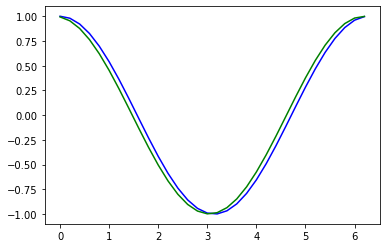

In [9]:
import math
import matplotlib.pyplot as plt

h = 0.2
start = 0
stop = 2*math.pi
X = np.arange(start, stop, h)


sin_devirative_analytical = [0] * len(X)
sin_devirative_numerical = [0] * len(X)

for i in np.arange(len(X)):
  sin_devirative_analytical[i] = math.cos(X[i])
  sin_devirative_numerical[i] = derivative(math.sin, X[i], h)

plt.plot(X, sin_devirative_analytical, 'b')
plt.plot(X, sin_devirative_numerical, 'g')
plt.show()

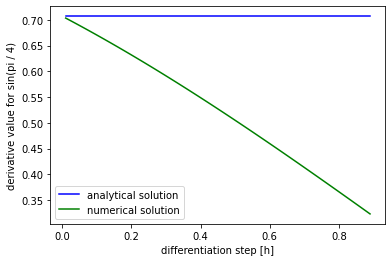

In [10]:
import math
import matplotlib.pyplot as plt

point = math.pi / 4
h = np.arange(0.01, 0.9, 0.01)

sin_devirative_analytical = [math.cos(point)] * len(h)
sin_devirative_numerical = [0] * len(h)

for i in np.arange(len(h)):
  sin_devirative_numerical[i] = derivative(math.sin, point, h[i])

plt.plot(h, sin_devirative_analytical, 'b')
plt.plot(h, sin_devirative_numerical, 'g')
plt.legend(loc="upper left")
plt.gca().legend(('analytical solution','numerical solution'))
plt.xlabel('differentiation step [h]')
plt.ylabel('derivative value for sin(pi / 4)')
plt.show()